In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Tue Feb 16 14:37:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    24W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Dropout
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1

In [ ]:
pd.set_option('display.expand_frame_repr', False)

In [ ]:
Total_X_data = pd.read_csv("X_data.csv")
Total_Y_data = pd.read_csv("Y_data_voltage.csv")

Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
Total_X_data.shape

(5344, 76)

In [ ]:
Total_X_data

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),g_Na(microS),g_t(microS),a_endo,b_endo,g_ss(microS),g_K1(microS),g_f(microS),f_Na,g_B_Na(microS),g_B_Ca(microS),g_B_K(microS),E_Ca(millivolt),Ca_o(millimolar),g_D(um3_per_ms),J_R(um3_per_ms),J_L(um3_per_ms),N,K_mNa(mM),K_mCa(mM),eta,k_sat,g_NCX(mM_per_ms),g_SERCA(mM_per_ms),K_SERCA(mM),g_pCa(mM_per_ms),K_mpCa(mM),g_CaB(mM_per_mV_ms),g_SRl(per_ms),k_CMDN(mM),B_CMDN(mM),k_on(per_mM_per_ms),k_Ref_off(per_ms),gamma_trpn,alpha_0(per_ms),alpha_r1(per_ms),alpha_r2(per_ms),n_Rel,K_z,n_Hill,Ca_50ref(mM),z_p,beta_1,beta_0,T_ref(N_per_mm2),a in component Cross_Bridges,A_1,A_2,A_3,alpha_1(per_ms),alpha_2(per_ms),alpha_3(per_ms),V_L(mV),del_VL(mV),phi_L,t_L(ms),tau_L(ms),tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,0.943460,0.035996,0.398748,0.367971,0.006301,0.023025,0.001178,0.101475,0.000052,0.000037,0.000189,50.378929,0.912795,0.063656,0.028554,0.000638,29033.551274,67.725076,1.085710,0.212287,0.094548,0.045182,0.000432,0.000601,0.000003,0.000726,3.577211e-08,0.000012,0.002797,0.061828,54.703623,0.122116,2.809838,0.009072,0.002374,0.000876,3.616333,0.188943,4.247229,0.000591,0.994816,-4.506566,3.837668,69.613973,0.485194,-31.005231,183.081552,84.382845,0.027666,0.136102,0.906774,-2.644113,6.127889,2.776715,1.202394,893.730844,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,0.873344,0.033241,0.840158,0.419822,0.005810,0.019431,0.000894,0.129981,0.000100,0.000022,0.000203,77.398315,1.273687,0.091899,0.028506,0.000713,48068.129504,86.484521,1.179412,0.241322,0.061292,0.048726,0.000491,0.000525,0.000003,0.000378,2.439642e-08,0.000028,0.002396,0.031686,148.035907,0.270115,2.130209,0.004325,0.002281,0.002287,3.098222,0.176333,1.720766,0.000746,0.479735,-2.144745,3.374904,39.436246,0.242832,-37.055382,77.068914,163.237275,0.033940,0.165306,0.898471,-2.777012,8.826759,2.609261,0.828769,760.785799,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,0.427102,0.051464,0.541589,0.294336,0.005527,0.032682,0.001876,0.131524,0.000115,0.000018,0.000144,63.824791,0.960379,0.041408,0.019436,0.000844,36760.361016,129.362895,1.567416,0.415073,0.076082,0.047526,0.000574,0.000697,0.000002,0.000395,3.902071e-08,0.000023,0.001901,0.034382,57.967900,0.261788,2.841805,0.007619,0.002156,0.001304,1.927688,0.215191,3.876491,0.001180,0.689346,-3.254414,2.520540,51.385288,0.382186,-18.549011,154.117366,94.889238,0.039312,0.067920,0.766250,-1.977765,6.814161,2.093193,1.398835,641.688994,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,1.186931,0.051356,0.508838,0.267433,0.004183,0.016378,0.000872,0.217301,0.000077,0.000048,0.000191,83.989147,1.073941,0.093631,0.022058,0.000796,35813.754983,77.915364,1.183638,0.317736,0.096556,0.021336,0.000300,0.000704,0.000002,0.000336,2.190880e-08,0.000021,0.002133,0.046351,104.319744,0.139568,2.218931,0.005965,0.002652,0.002351,4.334115,0.134191,4.066621,0.001353,0.580554,-3.842275,7.205187,74.265184,0.214581,-36.520512,188.191449,183.787629,0.020841,0.194512,0.357368,-1.225460,10.145411,2.740481,0.851633,798.744010,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,0.838384,0.024628,0.394305,0.420007,0.005825,0.023415,0.001802,0.241262,0.000071,0.000018,0.000115,68.291056,1.014535,0.067958,0.020678,0.000955,61319.601263,59.46208

In [ ]:
Total_X_data = Total_X_data.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [ ]:
Total_X_data.columns

Index(['V_myo(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)', 'i_NaK_max(uA)',
       'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)', 'Na_o(millimolar)',
       'Ca_TRPN_Max(mM)', 'g_t(microS)', 'a_endo', 'b_endo', 'g_ss(microS)',
       'g_K1(microS)', 'g_f(microS)', 'g_B_Na(microS)', 'g_B_Ca(microS)',
       'Ca_o(millimolar)', 'g_D(um3_per_ms)', 'J_R(um3_per_ms)',
       'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)', 'eta',
       'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'g_CaB(mM_per_mV_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)',
       'k_on(per_mM_per_ms)', 'k_Ref_off(per_ms)', 'gamma_trpn',
       'Ca_50ref(mM)', 'A_1', 'A_2', 'A_3', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)', 'K_L(mM)',
       'tau_s_ss'],
      dtype='object')

In [ ]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [ ]:
X_data = Total_X_data[1068:]
Y_data = Total_Y_data[1068:]

In [ ]:
X_data.shape

(4276, 49)

In [ ]:
Y_data.shape

(4276, 250)

## Scaling and splitting the X_data and Y_data

In [ ]:
scaler_x = StandardScaler().fit(X_data)
scaler_y = StandardScaler().fit(Y_data)

X_data = scaler_x.transform(X_data)
Y_data = scaler_y.transform(Y_data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

## TRAINING THE MODEL

In [ ]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:

model1 = models.Sequential()
model1.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer=optimizer, loss='mse', metrics=[r_square])


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 232)               11600     
_________________________________________________________________
batch_normalization (BatchNo (None, 232)               928       
_________________________________________________________________
dropout (Dropout)            (None, 232)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 232)               928       
_________________________________________________________________
dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 232)               5

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)



In [ ]:
callbacks = [callback,reduce_lr]

In [ ]:
%%time
history1 = model1.fit(X_train, y_train,
                  epochs=2000,
                  batch_size=128,
                 validation_data=(X_val, y_val),shuffle=True, callbacks =[callbacks])

Epoch 1/2000
27/27 [==============================] - 2s 26ms/step - loss: 2.1371 - r_square: -1.1962 - val_loss: 1.0494 - val_r_square: -0.0097
Epoch 2/2000
27/27 [==============================] - 0s 6ms/step - loss: 2.0079 - r_square: -1.0656 - val_loss: 1.0529 - val_r_square: -0.0132
Epoch 3/2000
27/27 [==============================] - 0s 6ms/step - loss: 1.8887 - r_square: -0.9197 - val_loss: 1.0470 - val_r_square: -0.0078
Epoch 4/2000
27/27 [==============================] - 0s 6ms/step - loss: 1.7524 - r_square: -0.8009 - val_loss: 1.0137 - val_r_square: 0.0238
Epoch 5/2000
27/27 [==============================] - 0s 6ms/step - loss: 1.5973 - r_square: -0.6478 - val_loss: 0.9334 - val_r_square: 0.1004
Epoch 6/2000
27/27 [==============================] - 0s 6ms/step - loss: 1.4195 - r_square: -0.4825 - val_loss: 0.8163 - val_r_square: 0.2122
Epoch 7/2000
27/27 [==============================] - 0s 6ms/step - loss: 1.2707 - r_square: -0.2941 - val_loss: 0.6964 - val_r_square: 0.

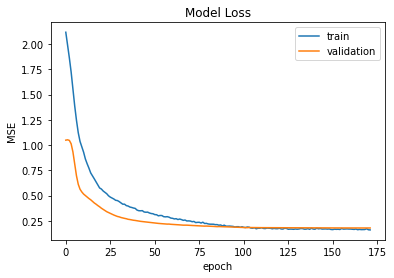

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

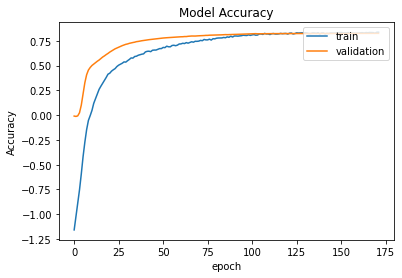

In [ ]:
plt.plot(history1.history['r_square'])
plt.plot(history1.history['val_r_square'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Text(0.5, 0, 'Epochs')

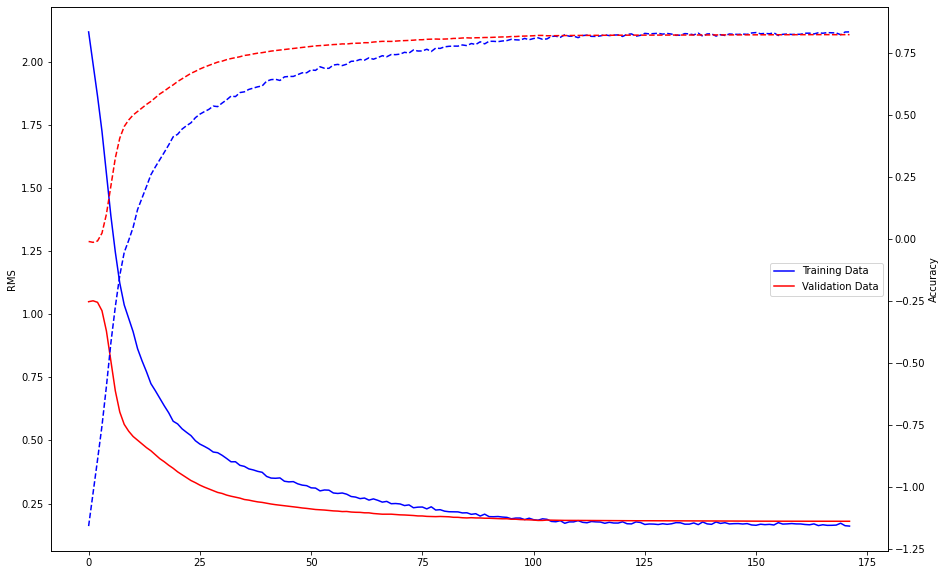

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


## TRAINING THE WHOLE MODEL AND PREDICTION

In [ ]:
##X_data and Y_data are already scaled

X_train_all = X_data
Y_train_all = Y_data


In [ ]:

model2 = models.Sequential()
model2.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model2.compile(optimizer=optimizer, loss='mse', metrics=[r_square])

In [ ]:
%%time
history2 = model2.fit(X_train_all, Y_train_all,
                  epochs=185,
                  batch_size=128,
                  )

Epoch 1/185
34/34 [==============================] - 1s 4ms/step - loss: 2.1562 - r_square: -1.1777
Epoch 2/185
34/34 [==============================] - 0s 4ms/step - loss: 2.0191 - r_square: -1.0130
Epoch 3/185
34/34 [==============================] - 0s 4ms/step - loss: 1.8520 - r_square: -0.8679
Epoch 4/185
34/34 [==============================] - 0s 4ms/step - loss: 1.6852 - r_square: -0.7017
Epoch 5/185
34/34 [==============================] - 0s 4ms/step - loss: 1.4835 - r_square: -0.4870
Epoch 6/185
34/34 [==============================] - 0s 4ms/step - loss: 1.2615 - r_square: -0.2703
Epoch 7/185
34/34 [==============================] - 0s 4ms/step - loss: 1.1233 - r_square: -0.1175
Epoch 8/185
34/34 [==============================] - 0s 4ms/step - loss: 1.0220 - r_square: -0.0199
Epoch 9/185
34/34 [==============================] - 0s 4ms/step - loss: 0.9297 - r_square: 0.0582
Epoch 10/185
34/34 [==============================] - 0s 4ms/step - loss: 0.8821 - r_square: 0.1059
E

In [ ]:
## Prediction on Test data

In [ ]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [ ]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [ ]:
ypred2 = model2.predict(Test_X_data)
print(r2_score(Test_Y_data,ypred2))

0.8274914611950172


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def final_model():
  model = models.Sequential()
  model.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(layers.Dense(232, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(layers.Dense(232,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(layers.Dense(232,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(layers.Dense(y_train.shape[1]))
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.compile(optimizer=optimizer, loss='mse', metrics=[r_square]) 
  return model


In [ ]:
my_model = KerasRegressor(build_fn=final_model) 
my_model.fit(X_train_all, Y_train_all,
                  epochs=185,
                  batch_size=128
                  )

Epoch 1/185
34/34 [==============================] - 1s 4ms/step - loss: 2.1519 - r_square: -1.2108
Epoch 2/185
34/34 [==============================] - 0s 4ms/step - loss: 2.0216 - r_square: -1.0424
Epoch 3/185
34/34 [==============================] - 0s 4ms/step - loss: 1.8711 - r_square: -0.8990
Epoch 4/185
34/34 [==============================] - 0s 4ms/step - loss: 1.7056 - r_square: -0.7211
Epoch 5/185
34/34 [==============================] - 0s 4ms/step - loss: 1.4834 - r_square: -0.4937
Epoch 6/185
34/34 [==============================] - 0s 4ms/step - loss: 1.2798 - r_square: -0.2789
Epoch 7/185
34/34 [==============================] - 0s 4ms/step - loss: 1.1353 - r_square: -0.1351
Epoch 8/185
34/34 [==============================] - 0s 4ms/step - loss: 1.0182 - r_square: -0.0177
Epoch 9/185
34/34 [==============================] - 0s 4ms/step - loss: 0.9431 - r_square: 0.0597
Epoch 10/185
34/34 [==============================] - 0s 4ms/step - loss: 0.8728 - r_square: 0.1129
E

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(232, activation='relu',input_shape=(X_data.shape[1],)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(layers.Dense(232, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(layers.Dense(232,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(layers.Dense(232,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model3.compile(optimizer=optimizer, loss='mse', metrics=[r_square])

In [ ]:
%%time
history3 = model3.fit(X_data, Y_data,
                  epochs=185,
                  batch_size=128,
                  )

Epoch 1/185
34/34 [==============================] - 1s 4ms/step - loss: 2.1088 - r_square: -1.1324
Epoch 2/185
34/34 [==============================] - 0s 4ms/step - loss: 1.8085 - r_square: -0.8568
Epoch 3/185
34/34 [==============================] - 0s 4ms/step - loss: 1.5264 - r_square: -0.5463
Epoch 4/185
34/34 [==============================] - 0s 4ms/step - loss: 1.2730 - r_square: -0.2673
Epoch 5/185
34/34 [==============================] - 0s 4ms/step - loss: 1.1078 - r_square: -0.1193
Epoch 6/185
34/34 [==============================] - 0s 4ms/step - loss: 1.0149 - r_square: -0.0302
Epoch 7/185
34/34 [==============================] - 0s 4ms/step - loss: 0.9451 - r_square: 0.0564
Epoch 8/185
34/34 [==============================] - 0s 4ms/step - loss: 0.8755 - r_square: 0.1198
Epoch 9/185
34/34 [==============================] - 0s 4ms/step - loss: 0.8086 - r_square: 0.1853
Epoch 10/185
34/34 [==============================] - 0s 4ms/step - loss: 0.7727 - r_square: 0.2224
Epo

In [ ]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [ ]:
Test_X_data.shape

(1068, 10)

In [ ]:
## Feature Importance Permutation GRAPHS with selected Features

In [ ]:
import seaborn as sns
def PFI_plotter_same(PFI,names,ap_times,save=False,filename=None):

  first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,10))
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  
  x_array = [f*0.025 for f in range(PFI.shape[2])]
  #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
  #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
  #plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)
  
  
  for i in range(PFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);


    plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    

    
    


    plt.legend()
  

In [ ]:
def PFI_plotter(PFI,names,ap_times,save=False,filename='None'):

  plt.figure(figsize=(15,160))
  #first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  #second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  #third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  

  x_array = [f*0.025 for f in range(PFI.shape[2])]
  for i in range(PFI.shape[1]):
    

    plt.subplot(PFI.shape[1],1,i+1);

    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;


    plt.plot(x_array,mu,c='r',linewidth=1);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.2)
    #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    #plt.hist(third_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    
    
    


    plt.legend(loc='right')

In [ ]:
X_test.shape

(1068, 10)

In [ ]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X) # baseline predictions
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c]) #Baseline error
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1])) # Empty array for importances
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]): # Iterate over columns
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j]) # Permute one column

      perm_yhat = model.predict(X)
      


      # Permuted Error
      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])]) 
      PFI[i,j,:] = FI_perm - base_line # Feature importance
  
  return PFI

In [ ]:
ap_times,amp,w,wp = aggregated_features(scaler_y.inverse_transform(Test_Y_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
Test_X_data.shape

(1068, 10)

In [ ]:
Test_Y_data.shape

(1068, 250)

In [ ]:
%%time
seeds = [123*i for i in range(1,4)]
PFI = Permuted_feature_impotance(Test_X_data,Test_Y_data,model3,seeds)

CPU times: user 3.33 s, sys: 122 ms, total: 3.45 s
Wall time: 3.1 s


In [ ]:
Test_X_data.shape

(1068, 10)

In [ ]:
Test_Y_data.shape

(1068, 250)

In [ ]:
PFI.shape

(3, 10, 250)

In [ ]:
names = ['V_myo(um3)',
  'N',
'g_D(um3_per_ms)',
'K_L(mM)',
	
	'V_myo_uL(uL)',
  'del_VL(mV)',
	'tau_L(ms)',
	'phi_L',
'g_t(microS)',
	'K_RyR(mM)',
	]

Text(0, 0.5, 'Feature Importance')

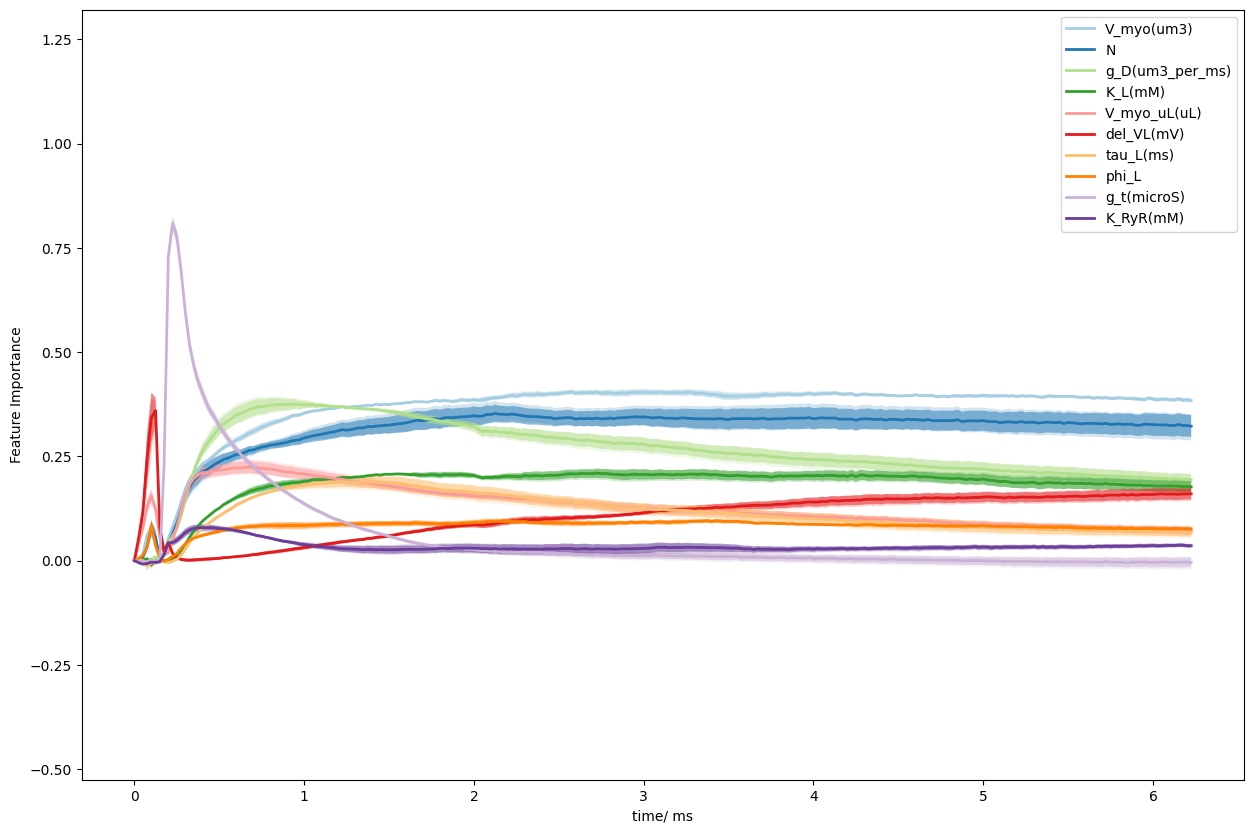

In [ ]:
plt.style.use('default')
PFI_plotter_same(PFI,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')

In [ ]:
PFI.shape

(3, 10, 250)

In [ ]:
df = pd.DataFrame([list(l) for l in PFI]).stack().apply(pd.Series).reset_index(1, drop=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,-0.000241,0.005577,0.012352,0.043581,0.067904,0.047586,0.007770,0.014929,0.044454,0.072696,0.100089,0.132842,0.163970,0.186086,0.201573,0.212346,0.226668,0.234732,0.245070,0.256217,0.265241,0.275068,0.282940,0.288921,0.297285,0.302291,0.308539,0.315925,0.319952,0.325077,0.330477,0.333583,0.337211,0.340098,0.342439,0.345352,0.348182,0.352952,0.354540,0.354507,...,0.394911,0.395887,0.396131,0.393903,0.392364,0.395305,0.395945,0.395039,0.394989,0.394866,0.394934,0.394742,0.393146,0.393294,0.392134,0.392546,0.390214,0.391218,0.390771,0.390990,0.389059,0.388977,0.389919,0.389473,0.387913,0.389042,0.386508,0.387160,0.385851,0.388821,0.386541,0.383524,0.385396,0.385879,0.383933,0.383432,0.385873,0.382528,0.384180,0.381624
0,0.000011,0.001952,0.005690,0.037643,0.094348,0.043606,0.000860,0.023860,0.045627,0.068852,0.096515,0.130734,0.168180,0.193006,0.211668,0.222070,0.233330,0.237151,0.242472,0.248809,0.253557,0.258133,0.260264,0.263205,0.267426,0.266564,0.269946,0.273315,0.273357,0.275214,0.276567,0.276432,0.277297,0.276978,0.276912,0.277682,0.278654,0.280882,0.281044,0.281191,...,0.301316,0.301591,0.301008,0.299315,0.299676,0.300688,0.300523,0.300413,0.300267,0.298246,0.299810,0.299672,0.297886,0.296653,0.297422,0.296856,0.297375,0.296258,0.295634,0.296071,0.294229,0.294077,0.295023,0.292727,0.293241,0.293900,0.291245,0.290896,0.293264,0.292165,0.290662,0.290574,0.290448,0.290665,0.290213,0.288989,0.291155,0.289177,0.289394,0.287542
0,0.000012,0.003140,0.000952,0.003951,-0.009138,0.012748,0.002350,0.022868,0.045252,0.057227,0.074829,0.103166,0.139629,0.174337,0.203948,0.229143,0.249516,0.264226,0.277878,0.288436,0.300886,0.308741,0.314471,0.320790,0.328201,0.330303,0.334948,0.339620,0.342469,0.346495,0.347359,0.349975,0.353039,0.353720,0.356273,0.357685,0.358139,0.360467,0.362152,0.362016,...,0.226315,0.226779,0.226932,0.225126,0.224832,0.227014,0.225713,0.223591,0.224726,0.222759,0.224878,0.223541,0.223437,0.221811,0.221484,0.221008,0.220563,0.218984,0.219855,0.217477,0.218484,0.217469,0.217713,0.216351,0.215167,0.215162,0.213942,0.214075,0.214217,0.212647,0.211857,0.211821,0.210328,0.211461,0.207958,0.209956,0.209498,0.209019,0.209521,0.207220
0,0.000221,0.002727,0.001595,0.001149,-0.019875,0.003976,-0.002032,0.003141,-0.000805,0.003812,0.009313,0.021036,0.036597,0.052913,0.067789,0.079952,0.092472,0.100015,0.108246,0.116119,0.122648,0.130439,0.135969,0.142278,0.148668,0.153721,0.158117,0.163837,0.167535,0.171209,0.173565,0.176849,0.179572,0.181227,0.181902,0.184131,0.184890,0.186343,0.186840,0.187486,...,0.181331,0.182338,0.182118,0.179369,0.179684,0.181272,0.181009,0.179539,0.180819,0.178400,0.179739,0.179115,0.177951,0.179751,0.177912,0.179005,0.176868,0.176966,0.176919,0.177602,0.175900,0.176373,0.175629,0.174545,0.173566,0.173682,0.173750,0.174437,0.171812,0.172189,0.171640,0.170770,0.170810,0.170571,0.170859,0.170842,0.170082,0.169529,0.169849,0.168902
0,-0.000012,0.036879,0.077075,0.120190,0.163507,0.130310,0.062236,0.015811,0.025739,0.057895,0.092872,0.135879,0.175634,0.199890,0.212939,0.218678,0.224682,0.224424,0.226819,0.228964,0.231833,0.233664,0.235506,0.238189,0.239191,0.240858,0.241589,0.243374,0.242961,0.241858,0.241331,0.239363,0.239383,0.236924,0.234601,0.232882,0.231010,0.230321,0.227542,0.225531,...,0.091642,0.092620,0.091727,0.090783,0.090527,0.091227,0.090576,0.091212,0.090462,0.089790,0.090669,0.089674,0.088993,0.088671,0.087821,0.088386,0.087271,0.087140,0.088450,0.088609,0.087098,0.086889,0.087234,0.087012,0.085302,0.086961,0.085157,0.086072,0.086048,0.085418,0.086439,0.084358,0.085590,0.084673,0.084196,0.085091,0.083751,0.083514,0.082977,0.081945
0,-0.000340,0.048552,0.112900,0.272212,0.389481,0.381307,0.080404,0.017061,0.034250,0.011

Text(0, 0.5, 'Feature Importance')

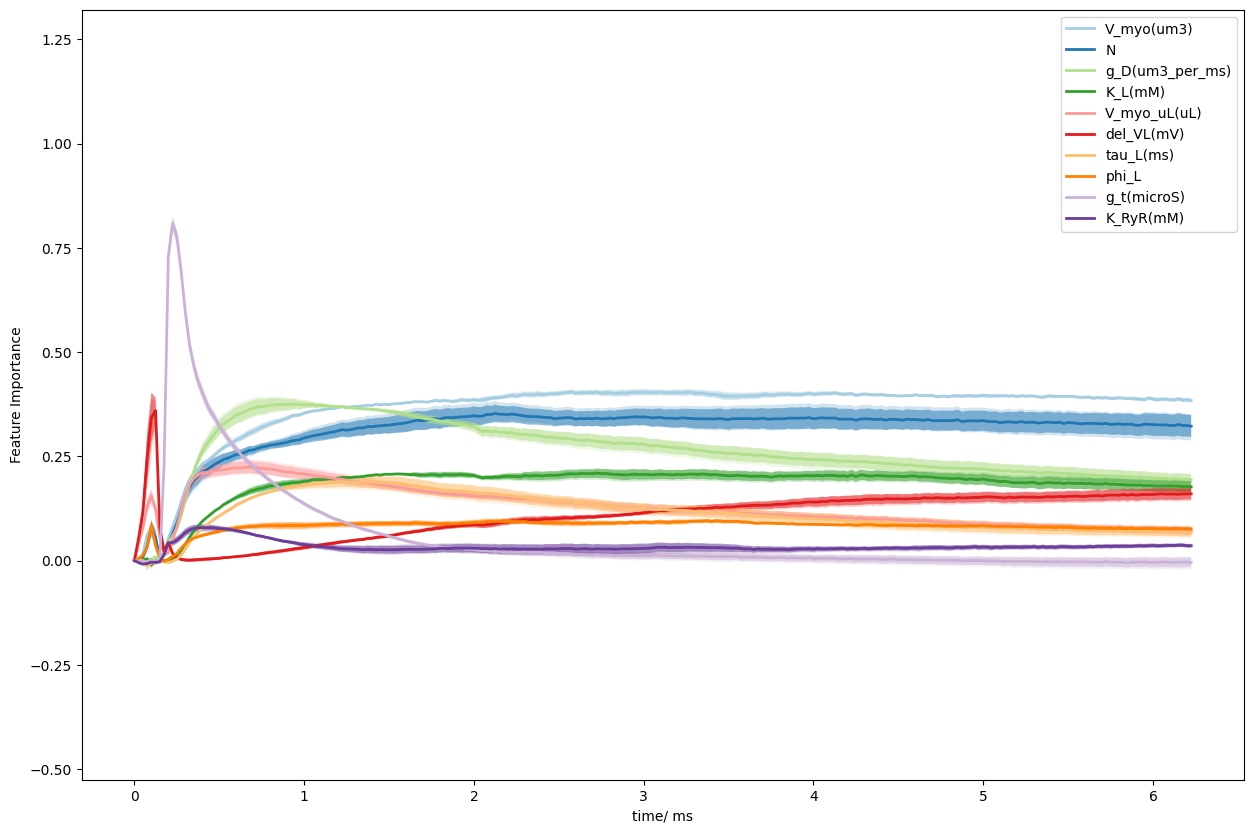

In [ ]:
PFI_plotter_same(PFI[:,:,:250],names,ap_times)

plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')

In [ ]:
Total_Y_data.loc[0]

0     -80.501460
1     -73.620314
2     -67.357399
3     -61.382787
4     -54.541782
         ...    
245    21.758281
246    22.005953
247    22.033896
248    21.922441
249    21.721304
Name: 0, Length: 250, dtype: float64

In [ ]:
stat = Y_test.describe()

In [ ]:
stat = stat.T

In [ ]:
stat

,count,mean,std,min,25%,50%,75%,max
0,1068.0,-80.501460,4.265254e-13,-80.501460,-80.501460,-80.501460,-80.501460,-80.501460
1,1068.0,-74.423287,7.092774e-01,-76.052434,-74.945786,-74.476667,-73.898314,-71.314359
2,1068.0,-68.696169,1.243651e+00,-71.631055,-69.577322,-68.764959,-67.819319,-60.907652
3,1068.0,-62.997090,3.240843e+00,-67.175811,-64.371299,-63.153943,-62.012344,24.198132
4,1068.0,-55.976093,9.495064e+00,-62.617825,-58.962560,-57.272137,-55.652157,61.491724
...,...,...,...,...,...,...,...,...
245,1068.0,-40.655253,4.319617e+01,-96.006974,-77.854472,-67.342654,3.323948,61.272012
246,1068.0,-40.670511,4.319583e+01,-96.011212,-77.892936,-67.368242,3.377017,61.274503
247,1068.0,-40.685749,4.319502e+01,-96.015368,-77.895905,-67.452076,3.420644,61.276901
248,1068.0,-40.700848,4.319396e+01,-96.019445,-77.898833,-67.569633,3.435944,61.279206


In [ ]:
mu0 = stat['mean'].to_numpy()

In [ ]:
std0 = stat['std'].to_numpy()

In [ ]:
upper0 = mu0+std0
lower0 = mu0-std0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


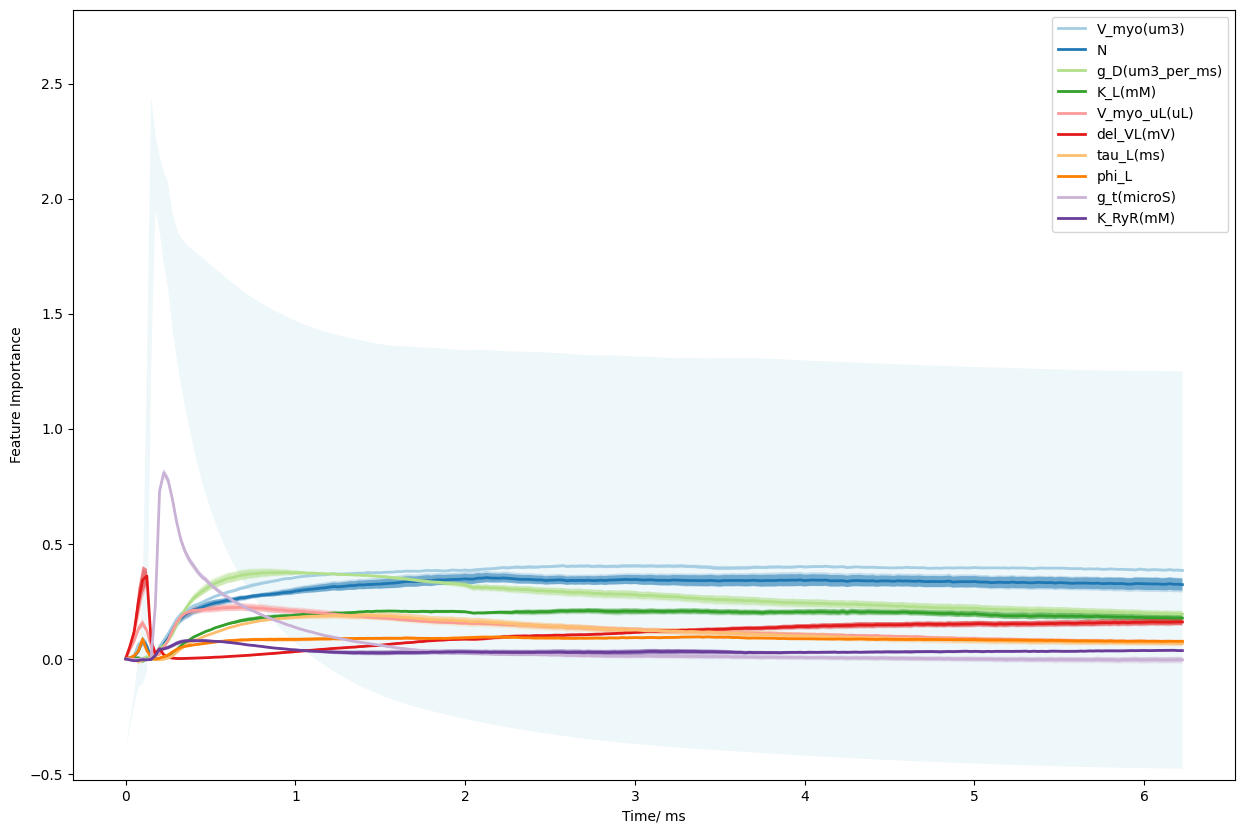

In [ ]:
colors = sns.color_palette("Paired", len(names))

fig = plt.figure(figsize=(15,10))

plt.fill_between(x_axis,lower0*0.02+60*0.02,upper0*0.02+60*0.02,facecolor='lightblue',alpha=0.2);


ax = fig.add_subplot(111)
ax.set_prop_cycle('color', colors)

x_array = [f*0.025 for f in range(PFI.shape[2])]
#plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
#plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
#plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)


for i in range(PFI.shape[1]):

  color = next(ax._get_lines.prop_cycler)['color']


  # Calculate min and max values of PFI for each variable
  sen_max = np.max(PFI[:,i,:],axis=0)
  sen_min = np.min(PFI[:,i,:],axis=0)
  plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



  # Calculate mean and std values of PFI for each variable
  mu = np.mean(PFI[:,i,:],axis=0)
  std = np.std(PFI[:,i,:],axis=0)

  upper = mu+std
  lower = mu-std

  plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

  
  plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
  plt.ylim((np.min(PFI)-0.5,np.max(PFI)+2))
  plt.ylabel('Feature Importance')
  plt.xlabel('Time/ ms')
  





  plt.legend()